In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def UnivariateGaussian(mean, var):
    flag = True
    while flag:
        U = np.random.uniform(-1, 1)
        V = np.random.uniform(-1, 1)
        S = U**2 + V**2
        
        flag = False
        if S >= 1:
            flag = True

    coef = (-2 * np.log(S)) / S
    X = U * np.sqrt(coef)
    Y = V * np.sqrt(coef)
    
    return [np.sqrt(var) * X + mean, np.sqrt(var) * Y + mean]

In [3]:
n = 50
D1 = np.zeros((n, 2))
D2 = np.zeros((n, 2))

In [4]:
w = [0, 0 , 0]
w = np.array(w).reshape(3, 1)
w[0][0]

0

In [5]:
A = np.zeros((n*2, 3))
A.shape

(100, 3)

In [6]:
for i in range(n):
    D1[i] = UnivariateGaussian(1, 2)
    A[i] = [1, D1[i][0], D1[i][1]]
    
    D2[i] = UnivariateGaussian(3, 4)
    A[i+n] = [1, D2[i][0], D2[i][1]]

In [7]:
A.shape

(100, 3)

In [8]:
def GetHessian(A):
    row, col = A.shape

    D = np.zeros((row, row))
    for i in range(row):
        val = np.exp(-(A[i] @ w))
        D[i][i] = val / ((1 + val) ** 2)
        
    Hessian = A.T @ D @ A
    rank = np.linalg.matrix_rank(Hessian)
    
    return Hessian, rank

In [9]:
r = 0.01

Y = np.array([np.zeros((n)), np.zeros((n)) + 1]).reshape(n*2, 1)
Y.shape

(100, 1)

In [10]:
def LogisticF(A, w):
    return 1 / (1 + np.exp(- (A @ w)))

In [11]:
def CalJ(w, A, Y):
    return A.T @ (Y - LogisticF(A, w))

In [12]:
def GradientDescent(w, A, Y, r=0.01):
    flag = True
    while(flag):
        w_new = w + r * A.T @ (Y - LogisticF(A, w))

        if np.linalg.norm(A.T @ (Y - LogisticF(A, w))) < 0.01:
            flag = False
        else:
            w = w_new
    
    return w

In [13]:
r * A.T @ (LogisticF(A, w) - Y)

array([[-4.33680869e-17],
       [-4.12266038e-01],
       [-4.87214470e-01]])

In [14]:
Hessian, rank = GetHessian(A)
print(rank)
if rank == 3:
    flag = True
    while(flag):
        Hessian_inv = np.linalg.inv(Hessian)
        w_new = w + r * (Hessian_inv @ A.T @ (Y - LogisticF(A, w)))

        if np.linalg.norm(Hessian_inv @ A.T @ (Y - LogisticF(A, w))) < 0.01:
            flag = False
        else:
            w = w_new
else:
    w = GradientDescent(w, A, Y, 0.01)

3


In [15]:
print(w)

[[-2.03031154]
 [ 0.59916178]
 [ 0.58857809]]


In [16]:
sample = np.array([D1, D2]).reshape(100, 2)
sample.shape

(100, 2)

In [17]:
y_pred = LogisticF(A, w).reshape(100, )
cluster1 = sample[(y_pred < 0.5)]
cluster2 = sample[(y_pred >= 0.5)]
print(cluster1[:, 0].size)
print(cluster2[:, 0].size)

51
49


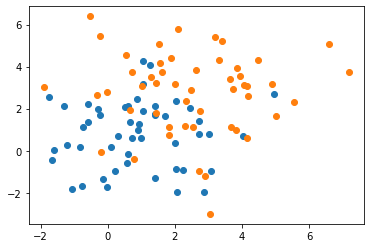

In [18]:
plt.plot(D1[:, 0], D1[:, 1], 'o')
plt.plot(D2[:, 0], D2[:, 1], 'o')

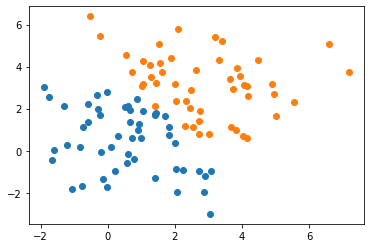

In [19]:
plt.plot(cluster1[:, 0], cluster1[:, 1], 'o')
plt.plot(cluster2[:, 0], cluster2[:, 1], 'o')